## Glass Identification

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
df.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

In [4]:
#renaming the column names
df.rename({'1.1':'Type of glass'},inplace=True, axis=1)

In [5]:
df.rename({'1':'Id number','1.52101':'RI','13.64':'Na','4.49':'Mg',
          '1.10':'Al','71.78':'Si','0.06':'K',
           '8.75':'Ca','0.00':'Ba','0.00.1':'Fe'},axis=1,inplace=True)

In [6]:
df.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [7]:
#checking shape
df.shape

(213, 11)

In [8]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [9]:
#droping id number
df.drop('Id number',axis=1,inplace=True)

In [10]:
df['Type of glass'].unique()
#label class is divided into 7 class

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [11]:
df['Type of glass'].value_counts()
#class label ahs different classes i.e different types of glasses are present in this column

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

#### Here label column seems imbalanced we will handle this later in the project

In [12]:
#checking for null
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

We don't have any null values present in our dataset which is a good thing.


Letscheck the statistics of the dataset.

In [13]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


##### Now that we have got a glimpse of the dataset, we know that it doesn't have any null values and all the attributes are numerical. Even the type which is categorical in nature is represented as integers. Please note there is no order among the classes.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## Exploratory Data Analyses

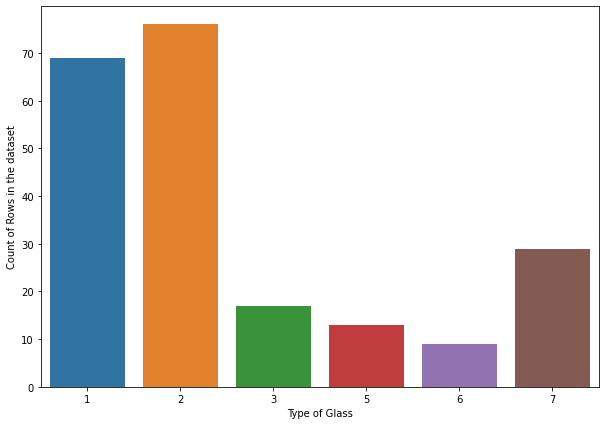

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Type of glass', data = df)
plt.xlabel('Type of Glass')
plt.ylabel('Count of Rows in the dataset')
plt.show()

We see that Type 2 and 1 have the highest occurences in the dataset, so we need to make sure that the train and test dataset have a good representation from all the types. The dataset source is forensic sciences department and probably the reason of the high count of type 1 & 2 is that many criminals break through building window glasses at the scene rather than breaking containers or tableware.

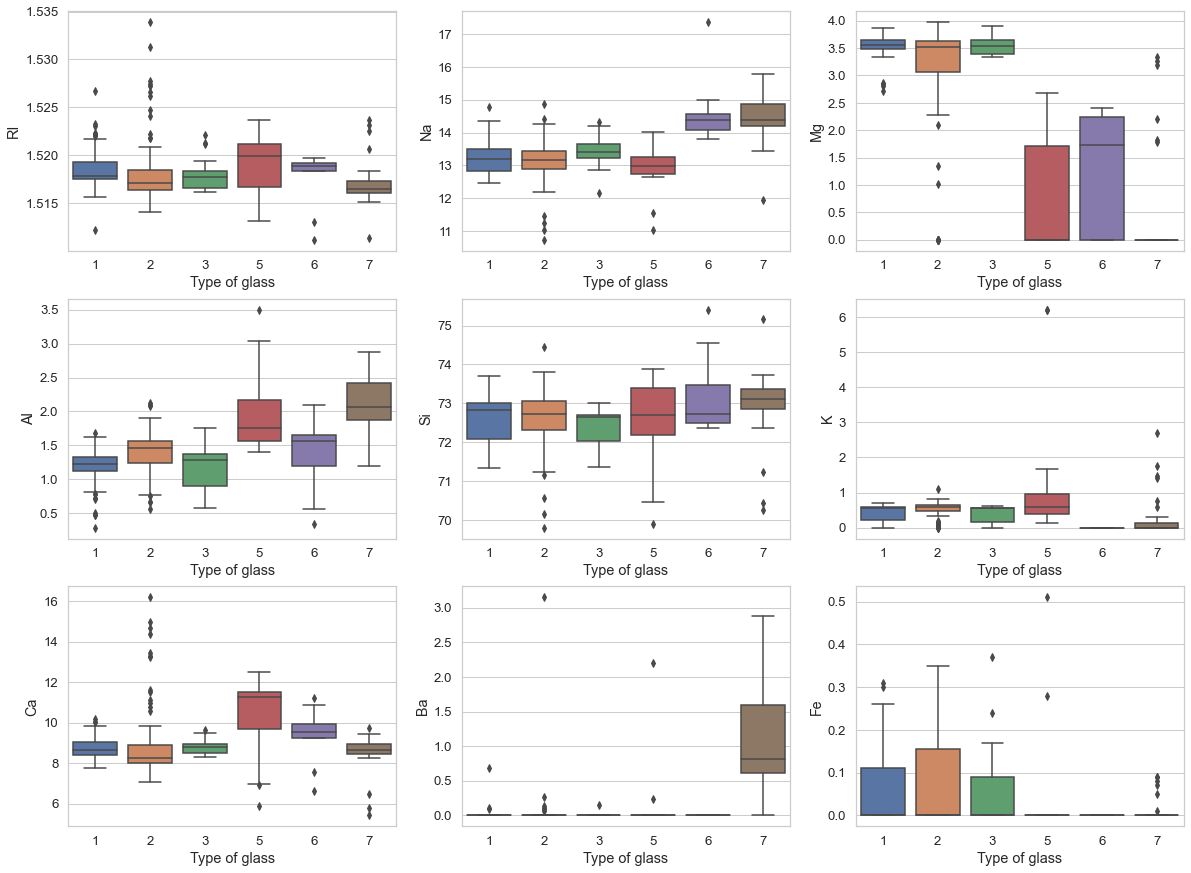

In [16]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type of glass', y='RI', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Type of glass', y='Na', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Type of glass', y='Mg', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Type of glass', y='Al', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Type of glass', y='Si', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='Type of glass', y='K', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Type of glass', y='Ca', data=df)
plt.subplot(3,3,8)
sns.boxplot(x='Type of glass', y='Ba', data=df)
plt.subplot(3,3,9)
sns.boxplot(x='Type of glass', y='Fe', data=df)
plt.show()

In the above boxplot we can clearly see the contribution of each element in each category of glasses.
he box plot shows that average Refractive index is similar for all types. Although, Type 5 has a wider range and slightly higher mean. Sodium content is higher in Type 6 & 7, whereas Magnesium content is fairly high in Type 1, 2 & 3. Aluminium is higher in type 5 & 7. Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. Potassium also doesn't provide much insight. But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items. Calcium is highest in type 5 and Barium in type 7. Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values for some glasses than the rest. This is because Iron is added mainly in colored glasses.

We got some idea on which feature provides more insight in differentiating one type from another. Now, let's see the relationship between each one of them through a pairplot. (We will leave out K, Ba and Fe due to sparse concentration)

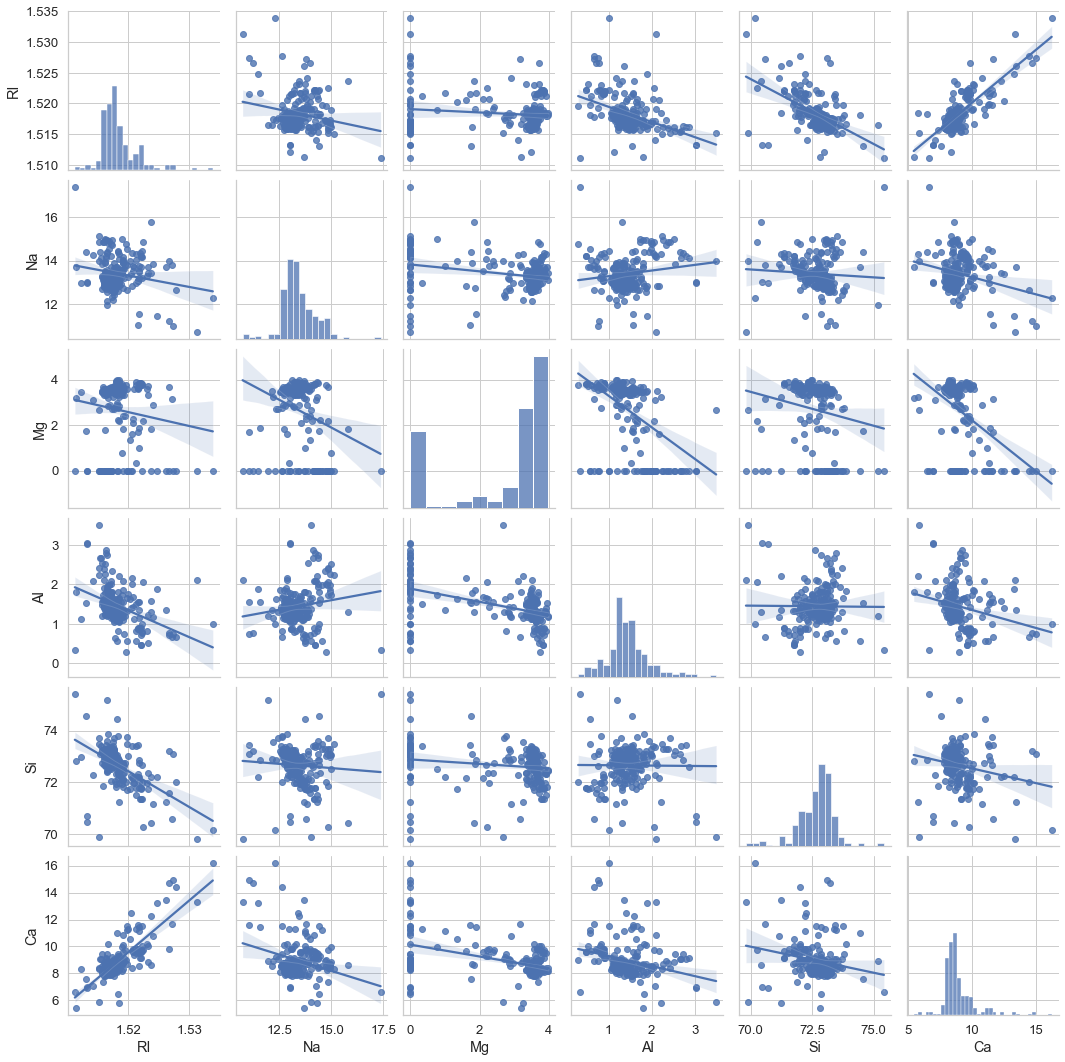

In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. Silica and RI seem to have an inverse relationship.

Type 1,2 & 3 have very similar properties. However, we can distinguish them based on whether they are flat or not. Basically, float process is used to flatten the glass into sheets. Let us see the density plot of flat vs non-flat glass on some of the properties.

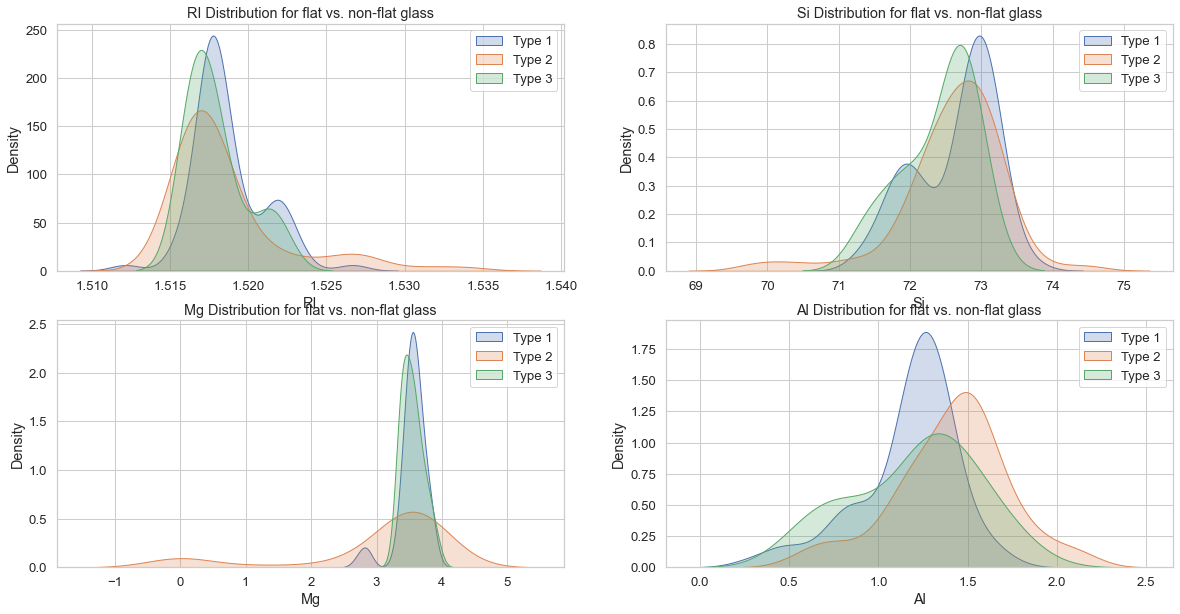

In [19]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(df["RI"][df['Type of glass']== 1], shade = True)
sns.kdeplot(df["RI"][df['Type of glass'] == 2], shade = True)
sns.kdeplot(df["RI"][df['Type of glass'] == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(df["Si"][df['Type of glass']== 1], shade = True)
sns.kdeplot(df["Si"][df['Type of glass'] == 2], shade = True)
sns.kdeplot(df["Si"][df['Type of glass'] == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(df["Mg"][df['Type of glass'] == 1], shade = True)
sns.kdeplot(df["Mg"][df['Type of glass'] == 2], shade = True)
sns.kdeplot(df["Mg"][df['Type of glass'] == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(df["Al"][df['Type of glass'] == 1], shade = True)
sns.kdeplot(df["Al"][df['Type of glass'] == 2], shade = True)
sns.kdeplot(df["Al"][df['Type of glass'] == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

Mostly the flat ones (1,3) overlap on all the properties except Aluminium. Aluminium has a wider range for type 3 than type 1. The non-float glass, type 2 has many extreme points which make its range very high

#### Let us plot a correlation heatmap to identify multicollinearity



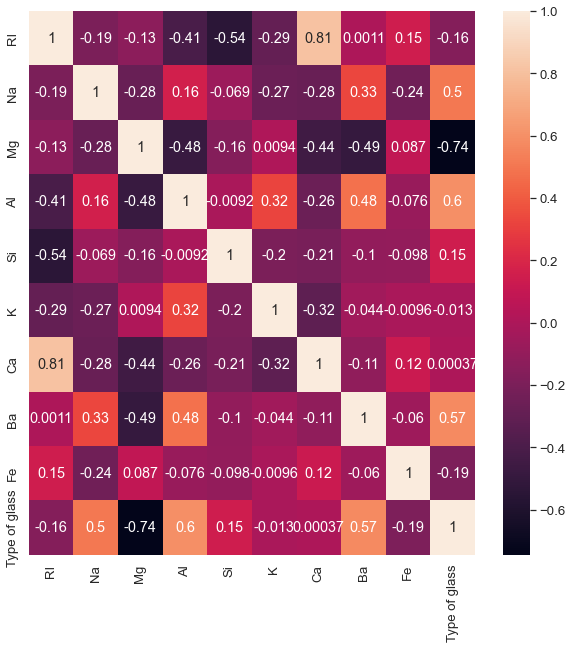

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

As seen in the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative. But since this is a classification technique and not regression, we cannot simply remove the collinear variables from the model, as they might be able to explain the difference between the target labels.

Let us look at a powerful method called Principal component analysis to decide on the candidate variables. This is valuable as it can help in dimension reduction and lower the cost of data collection.

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
x=df.drop('Type of glass',axis=1)


In [23]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[-0.2451006 ,  0.59188032,  0.64293659, ..., -0.79259935,
        -0.35380764, -0.58830108],
       [-0.71682556,  0.15094587,  0.60814353, ..., -0.82773435,
        -0.35380764, -0.58830108],
       [-0.22860672, -0.24099586,  0.7055641 , ..., -0.51854637,
        -0.35380764, -0.58830108],
       ...,
       [ 0.75772729,  1.16754474, -1.8621639 , ..., -0.36395239,
         2.94550057, -0.58830108],
       [-0.60796596,  1.19204109, -1.8621639 , ..., -0.33584439,
         2.80467644, -0.58830108],
       [-0.4100394 ,  1.00831841, -1.8621639 , ..., -0.2374664 ,
         3.00585377, -0.58830108]])

In [24]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[-0.57740964, -0.75555522, -0.54131111, ..., -0.02855076,
        -0.28624473, -0.01052633],
       [-0.9422224 , -0.92494715, -0.54953705, ..., -0.3701861 ,
        -0.09768518,  0.0217974 ],
       [-0.14521009, -0.96082439, -0.10984278, ..., -0.0576203 ,
        -0.00500546,  0.09215013],
       ...,
       [-1.65315732,  3.28863753, -0.93120716, ...,  0.6730498 ,
        -0.89009734,  0.04644362],
       [-2.34437523,  2.76379413, -1.2408532 , ...,  0.67853223,
         0.07604161, -0.02742114],
       [-2.23570365,  3.03487926, -0.8950945 , ...,  0.46165628,
         0.06444171, -0.01953852]])

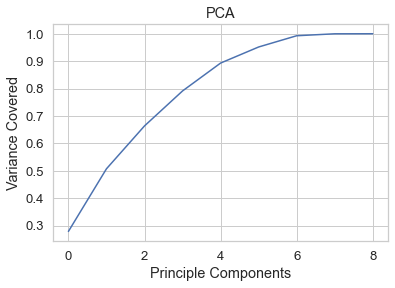

In [25]:
#plot scree to check best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principle Components")
plt.ylabel("Variance Covered")
plt.title("PCA")
plt.show()

The first 6 components account for about 99% of the total explained variance. We can run the analysis again only with these six components.



In [26]:
pca_red = PCA(n_components=6)
new_X = pca_red.fit_transform(X_scaled)
X=pd.DataFrame(new_X,columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
X

,pc1,pc2,pc3,pc4,pc5,pc6
0,-0.577410,-0.755555,-0.541311,0.775011,-0.265563,-0.111058
1,-0.942222,-0.924947,-0.549537,0.218914,-0.240031,0.127787
2,-0.145210,-0.960824,-0.109843,0.423085,-0.481010,0.289024
3,-0.353912,-1.090275,-0.484283,0.083220,-0.434338,0.300431
4,-0.284636,-1.329052,0.846054,-0.915688,1.818969,-0.146221
...,...,...,...,...,...,...
208,-2.356322,3.070655,0.088726,-0.396994,0.113199,0.224990
209,-2.372941,3.117594,-1.107207,0.297590,0.624278,0.618296
210,-1.653157,3.288638,-0.931207,-0.167576,0.456105,1.245493
211,-2.344375,2.763794,-1.240853,-0.514163,0.521900,1.000294


In [27]:
y=df['Type of glass']
y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type of glass, Length: 213, dtype: int64

### Taking care of class imbalance

In [28]:
y.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
# adding samples to make all the categorical quality values same
ove_smp=SMOTE()
X,y=ove_smp.fit_resample(X,y)

In [31]:
y.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: Type of glass, dtype: int64

### Label Binarization

In [32]:
Y = y.apply(lambda y_value:1 if y_value>=5 else 0) # 1 is for non-window glass (classes 5-7). and 0 for window glass (classes 1-4) 
Y #Displaying the label after applying label binarization

0      0
1      0
2      0
3      0
4      0
      ..
451    1
452    1
453    1
454    1
455    1
Name: Type of glass, Length: 456, dtype: int64

In [33]:
Y.value_counts()

0    228
1    228
Name: Type of glass, dtype: int64

### Now that we have our features and target labels, let us proceed to model development.



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV 

In [35]:
# Splitting the dataset into test and training with 70% for training the model
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of x_train :",y_train.shape)
print("Size of x_train :",y_test.shape)


Size of x_train : (319, 6)
Size of x_test : (137, 6)
Size of x_train : (319,)
Size of x_train : (137,)


### Writing one function for different models accuracy


In [36]:
def metric_score(model, X,Y):
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting for training
    pred_train = model.predict(x_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
     # Accuracy Score for training
    acc_score1 = (accuracy_score(y_train, pred_train))*100
    print("Accuracy Score for training:", acc_score1)
    
    # Accuracy Score for testing
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score for testing:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    #cv_score = (cross_val_score(model, x, Y, cv=5).mean())*100
    #print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    #result = acc_score - cv_score
    #print("\nAccuracy Score - Cross Validation Score is", result)


I have defined a class that will perform the training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score for any machine learning model that calls for this function.

### Logistic Regression


In [37]:
model=LogisticRegression()
metric_score(model, X, Y)


Accuracy Score for training: 94.67084639498434
Accuracy Score for testing: 94.8905109489051

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.97      0.94      0.95        78

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



### RandomForestClassifier


In [38]:
model=RandomForestClassifier()

metric_score(model, X, Y)


Accuracy Score for training: 100.0
Accuracy Score for testing: 95.62043795620438

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        59
           1       0.96      0.96      0.96        78

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



### Decision Tree

In [39]:
model=DecisionTreeClassifier()
metric_score(model, X, Y)


Accuracy Score for training: 100.0
Accuracy Score for testing: 96.35036496350365

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.99      0.95      0.97        78

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



### SVC

In [40]:
svc=SVC()
metric_score(model, X, Y)



Accuracy Score for training: 100.0
Accuracy Score for testing: 95.62043795620438

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.97      0.95      0.96        78

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



In [41]:
from sklearn.neighbors import KNeighborsClassifier


### KNN

In [42]:
knn=KNeighborsClassifier()
metric_score(model, X, Y)


Accuracy Score for training: 100.0
Accuracy Score for testing: 97.08029197080292

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        59
           1       0.99      0.96      0.97        78

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



### XGBClassifier

In [43]:
import xgboost as xgb

In [44]:
xgb=xgb.XGBClassifier()

xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [45]:
metric_score(xgb, X, Y)

Accuracy Score for training: 100.0
Accuracy Score for testing: 95.62043795620438

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.97      0.95      0.96        78

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



In [51]:
lr=LogisticRegression()
svc=SVC()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()

In [52]:
models=[lr,dt,rfc,svc,knn]
for m in models:
    cvscore=cross_val_score(m,X,Y,cv=10)
    print(f'Metrics of model {m}')
    print(cvscore)
    print(f'Mean cv score: ',cvscore.mean())
    print(cvscore.std())
    print('\n')

Metrics of model LogisticRegression()
[0.91304348 0.97826087 0.97826087 0.86956522 0.82608696 0.86956522
 0.97777778 1.         0.97777778 1.        ]
Mean cv score:  0.9390338164251208
0.06049605516184061


Metrics of model DecisionTreeClassifier()
[0.89130435 0.97826087 0.97826087 0.95652174 0.93478261 0.86956522
 1.         0.91111111 0.97777778 0.93333333]
Mean cv score:  0.9430917874396135
0.040460948828785


Metrics of model RandomForestClassifier()
[1.         0.95652174 0.97826087 0.95652174 0.80434783 0.91304348
 1.         1.         1.         1.        ]
Mean cv score:  0.9608695652173914
0.058976782461958845


Metrics of model SVC()
[1.         0.97826087 1.         0.97826087 0.82608696 0.91304348
 1.         1.         1.         1.        ]
Mean cv score:  0.9695652173913043
0.05430433042085564


Metrics of model KNeighborsClassifier()
[1.         0.93478261 1.         1.         0.82608696 0.93478261
 1.         1.         0.97777778 0.97777778]
Mean cv score:  0.96512

### Plotting roc_auc_curve to find the best model 

In [53]:
lr.fit(x_train,y_train)
svc.fit(x_train,y_train)
dt.fit(x_train,y_train)
rfc.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
lr.score(x_test,y_test)
svc.score(x_test,y_test)
rfc.score(x_test,y_test)
dt.score(x_test,y_test)
knn.score(x_test,y_test)
print("All model's score captured")

All model's score captured


In [55]:
lr.fit(x_train,y_train)
svc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
dt.fit(x_train,y_train)
knn.score(x_train,y_train)
print("All models are trained")

All models are trained


In [56]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

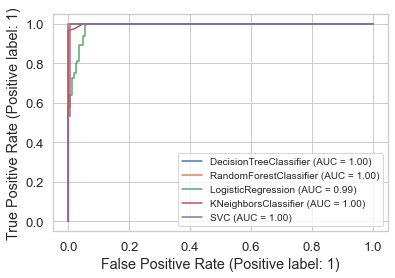

In [57]:
#plotting curves on training data
disp=plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

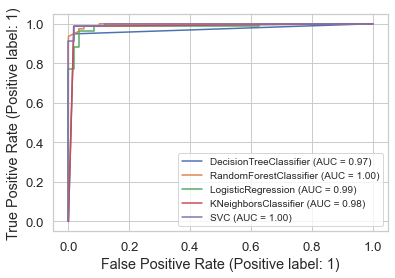

In [58]:
#plotting curve on test data
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)


plt.legend(prop={'size':10},loc='lower right')
plt.show()

### Choosing KNN Model as its giving almost same acuuracy for Training and Test data and good F1 score



### Saving the model in knn

In [60]:
import pickle

In [62]:
filename='Glass_Identification.pkl'

In [63]:
pickle.dump(knn,open(filename,'wb'))